In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('insurance.csv',encoding='latin1')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Overview

In [4]:
print("Shape of data:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of data: (1338, 7)

Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("\ncategorical_features:\n", categorical_features)
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print("\nnumerical_features:\n", numerical_features)


categorical_features:
 ['sex', 'smoker', 'region']

numerical_features:
 ['age', 'bmi', 'children', 'charges']


In [32]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [33]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [34]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

======================================
# Exploratory Data Analysis
======================================

### Numerical feature distribution

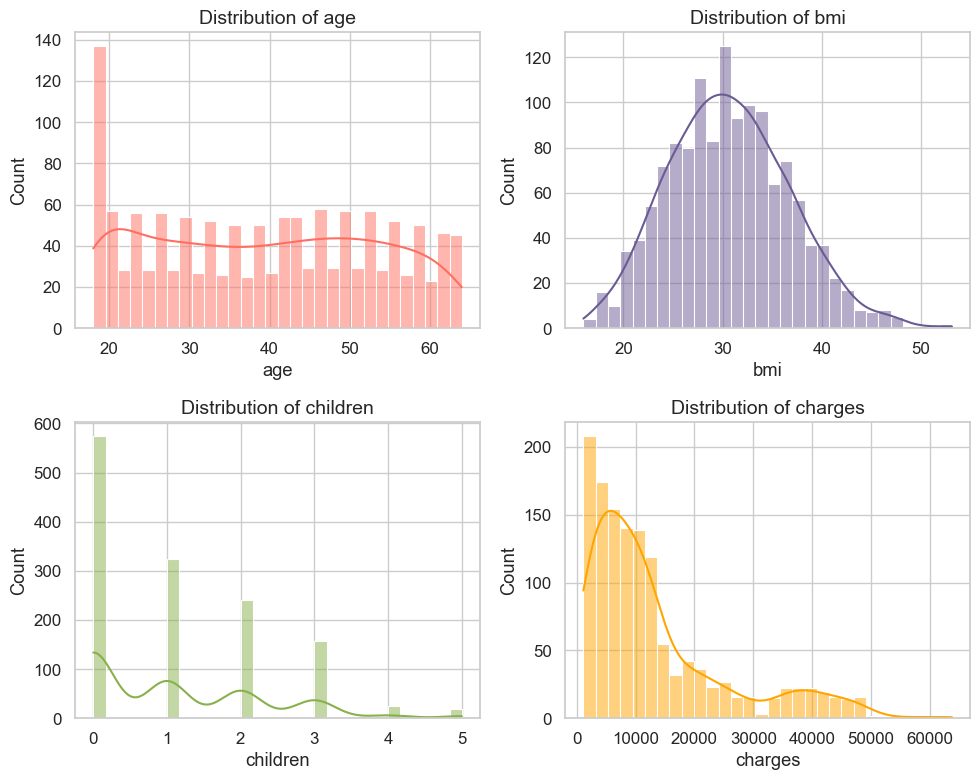

In [ ]:
num_cols = ['age', 'bmi', 'children', 'charges']

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # Flatten to loop easily
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA500']  # custom colors

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Interpretation : 
1. Age  
Shape: Fairly uniform distribution between 20 and 60, with a noticeable spike at age 18–19.  
Insight: Data covers a wide adult age range, suggesting age-based patterns in charges could be interesting to explore.  

2. BMI (Body Mass Index)  
Shape: Bell-shaped (roughly normal) with a right tail — some extreme BMI values > 50.  
Insight: Most people have BMI between 25–35 (overweight range), but there are notable outliers which might affect costs.  

3. Children  
Shape: Highly skewed — most policyholders have 0 children, with numbers decreasing as children count increases.  
Insight: Majority of insured individuals are either single or childless couples; family size might influence charges, but few have more than 3 children.  

4. Charges (Target Variable)  
Shape: Right-skewed with multiple peaks — majority of charges are below 20,000, but some go beyond 60,000.  
Insight: The skew suggests a few individuals incur very high costs, possibly due to smoking status, age, or health risks.  

### Categorical Feature Distribution

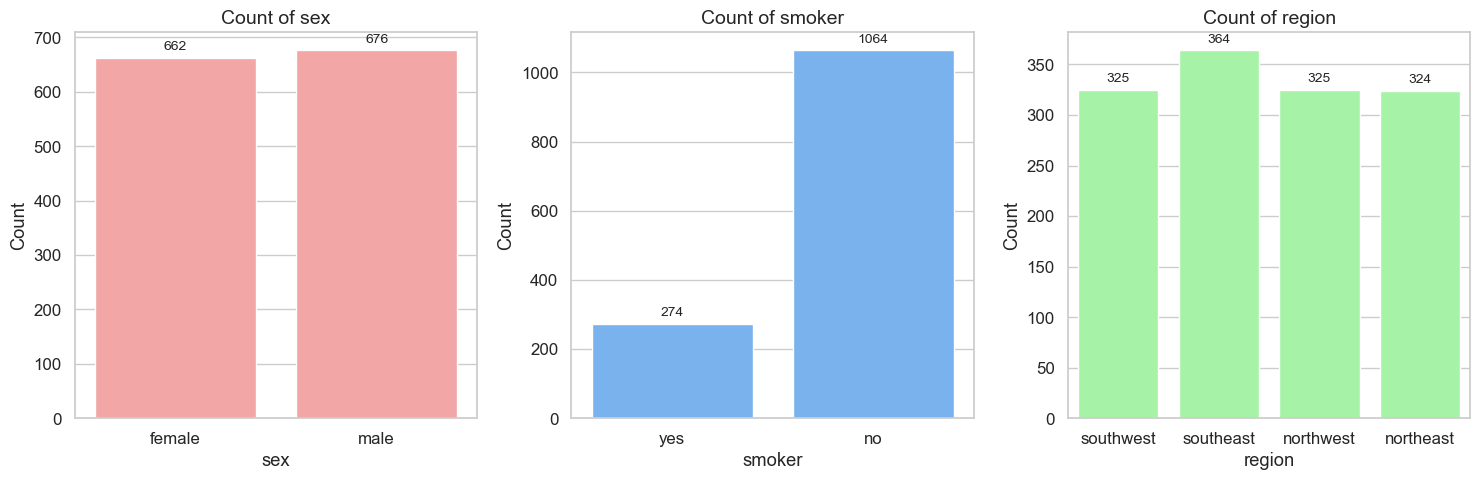

In [21]:
cat_cols = ['sex', 'smoker', 'region']

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 5))
axes = axes.flatten()

colors = ['#FF9999', '#66B2FF', '#99FF99']

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    # Show exact counts on bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 8), 
                         textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretation :

1. Sex: The dataset is well-balanced between males (676) and females (662), meaning gender bias in predictions should be minimal.

2. Smoker: Majority are non-smokers (1,064) compared to smokers (274). Given the known cost impact of smoking, this imbalance could influence model training.

3. Region: Customers are fairly evenly distributed across all regions, with the southeast slightly higher (364). This helps ensure regional trends can be learned without severe imbalance.

### Bivariate Analysis : Numerical vs Target

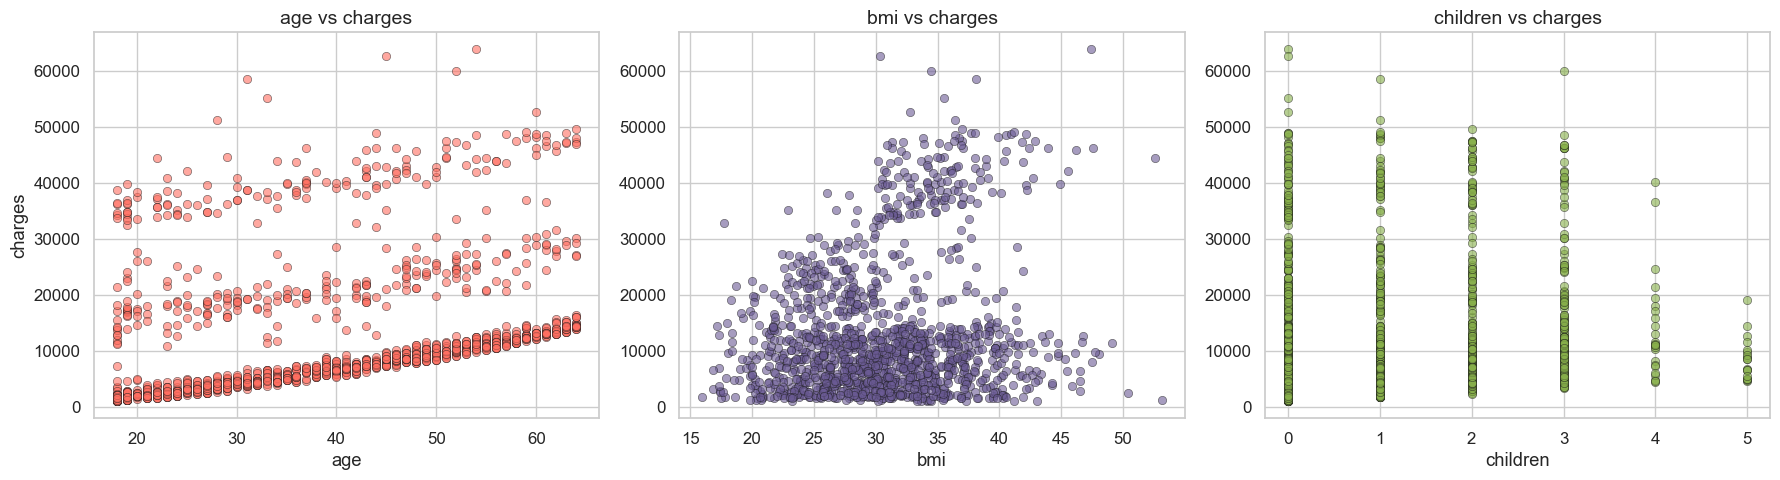

In [23]:
num_features = ['age', 'bmi', 'children']
target = 'charges'

colors = ['#FF6F61', '#6B5B95', '#88B04B']

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(1, len(num_features), figsize=(18, 5))

for i, col in enumerate(num_features):
    sns.scatterplot(
        data=df,
        x=col,
        y=target,
        ax=axes[i],
        color=colors[i],
        alpha=0.6,
        edgecolor='k'
    )
    axes[i].set_title(f'{col} vs {target}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target if i == 0 else "")

plt.tight_layout()
plt.show()


### Interpretation :

1. Age vs. Charges: Charges generally increase with age, especially for higher-cost clusters. The clear separation of cost bands suggests smoker status might be influencing this pattern.

2. BMI vs. Charges: Higher BMI values (especially above ~30) show more extreme charges, again likely driven by additional health risks in certain individuals.

3. Children vs. Charges: No strong linear relationship; however, individuals with 0–3 children appear across all charge ranges, meaning children count alone doesn’t explain cost differences.

### Bivariate Analysis : Categorical vs Target

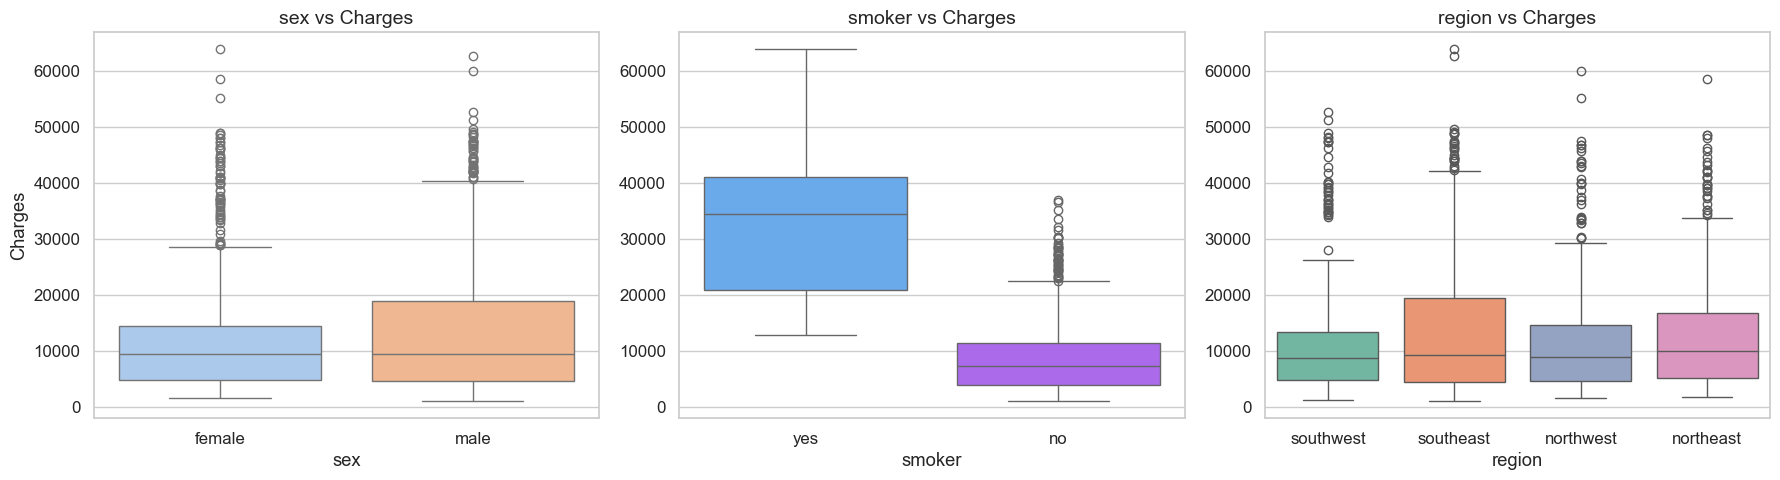

In [24]:
cat_cols = ['sex', 'smoker', 'region']

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))

palettes = ['pastel', 'cool', 'Set2']

for i, col in enumerate(cat_cols):
    sns.boxplot(
        x=col,
        y='charges',
        data=df,
        ax=axes[i],
        palette=palettes[i]
    )
    axes[i].set_title(f'{col} vs Charges', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Charges' if i == 0 else "")

plt.tight_layout()
plt.show()

### Interpretation :

1. Sex vs. Charges: Median charges are similar for males and females, suggesting gender alone does not strongly influence medical costs.

2. Smoker vs. Charges: Smokers have dramatically higher charges, with a much wider spread and several extreme outliers — clear evidence smoking is a major cost driver.

3. Region vs. Charges: Median charges are similar across regions, though the southeast shows slightly higher median and spread, possibly linked to smoker prevalence or health conditions.

### Correlation Heatmap

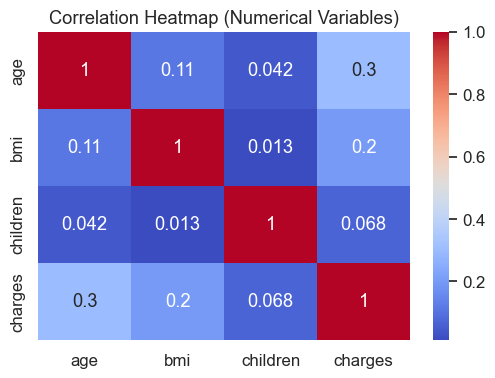

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()

### Interpretation :

1. Age vs. Charges (0.30): Weak positive correlation — older individuals tend to have slightly higher charges, but the relationship isn’t strong.

2. BMI vs. Charges (0.20): Very weak positive correlation — higher BMI is loosely associated with increased charges, possibly due to related health risks.

3. Children vs. Charges (0.068): Negligible correlation — number of dependents does not significantly impact charges.

**Overall**,  No strong linear correlations, suggesting that non-linear effects and categorical variables (like smoker status) play a more significant role in predicting charges.

### Pairplot

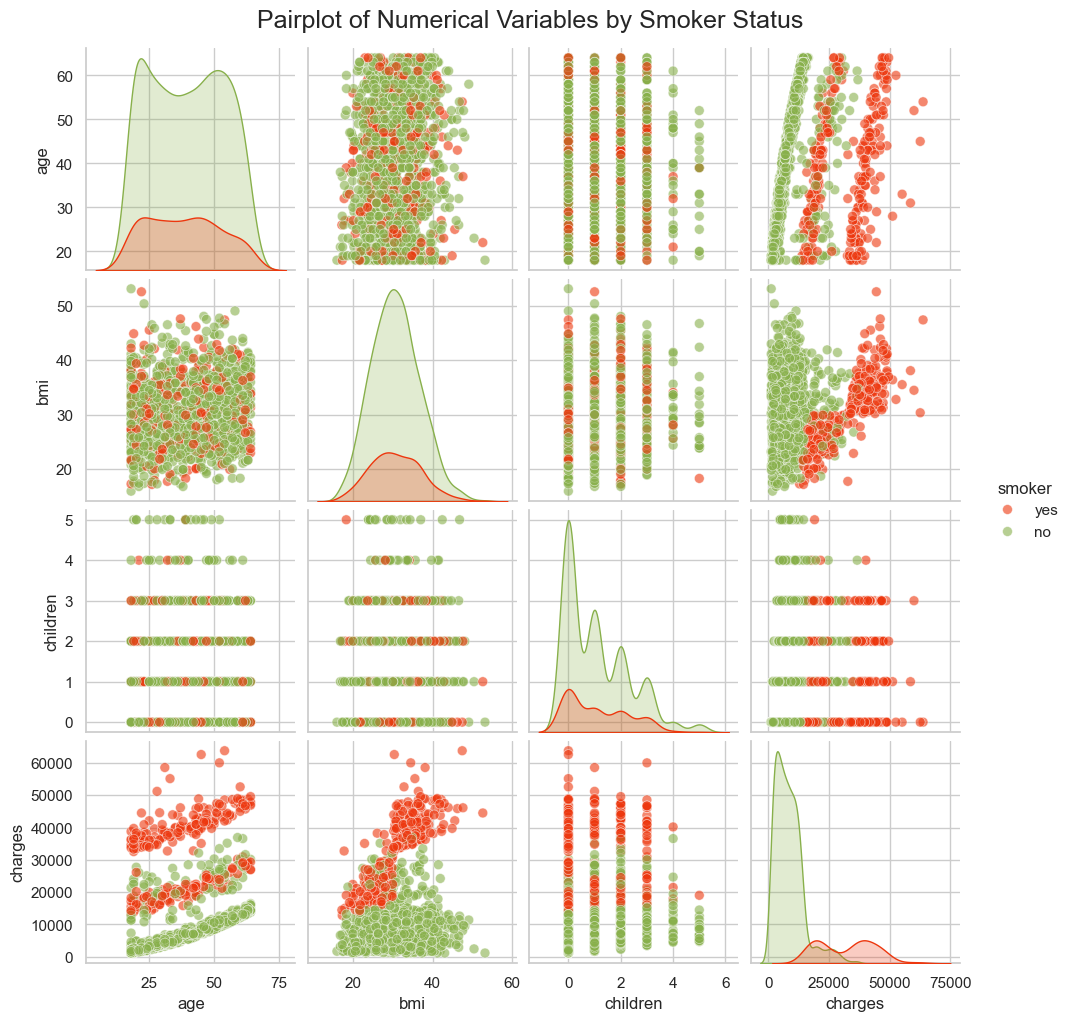

In [31]:
sns.set_theme(style="whitegrid")
g = sns.pairplot(
    df,
    vars=["age", "bmi", "children", "charges"],
    hue="smoker",
    palette={"yes": "#ED370E", "no": "#88B04B"},
    kind="scatter",
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 50, "edgecolor": "w", "linewidth": 0.5}
)

g.fig.suptitle("Pairplot of Numerical Variables by Smoker Status", fontsize=18, y=1.02)
plt.show()

### Interpretation : 

1. Age vs Charges – Smokers (red) have drastically higher charges across all ages, especially in middle and older age groups.

2. BMI vs Charges – High BMI is linked to higher charges, but this effect is far stronger for smokers.

3. Children vs Charges – Number of children has little direct impact on charges; smoker status dominates the cost differences.

4. Age vs BMI – No strong relationship; BMI is scattered across all ages.

5. Age/BMI/Children – These are mostly independent of each other (no visible correlation).

6. Smoker split – Smokers cluster in high-charge zones; non-smokers mostly have charges below ~20k.

**Key Insight :**
Smoker status is the most influential factor driving insurance charges, outweighing BMI, age, and number of children in its effect size.

## Data Preprocessing

In [7]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['charges'], axis=1)
y = df['charges']

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['sex','smoker','region']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [9]:
X=preprocessor.fit_transform(X)

In [10]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 8), (268, 8))

## Model Training

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "XGboost":XGBRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6105.5452
- Mean Absolute Error: 4208.2346
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5796.2847
- Mean Absolute Error: 4181.1945
- R2 Score: 0.7836


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5172.6262
- Mean Absolute Error: 3072.8264
- R2 Score: 0.8146
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6817.3845
- Mean Absolute Error: 3903.3943
- R2 Score: 0.7006


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 494.2060
- Mean Absolute Error: 29.5725
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6450.9768
- Mean Absolute Error: 3118.9386
- R2 Score: 0.7319


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1883.6646
- Mean Abs

### Model Comparison & Conclusion:

Linear Regression: Stable baseline (R² ≈ 0.78), low overfitting, moderate accuracy.  
KNN: Good train fit but poorer test generalization (R² ≈ 0.70).  
Decision Tree: Severe overfitting (R² train ≈ 1.0, test ≈ 0.73).  
Random Forest: Strong performance (R² ≈ 0.86), low overfitting, excellent candidate.  
AdaBoost: Balanced, robust (R² ≈ 0.81), safe but slightly lower accuracy.  
XGBoost: High accuracy but moderate overfitting (train R² ≈ 0.99, test ≈ 0.85).  

Top picks for tuning: **Random Forest and XGBoost**  for best mix of performance and generalization.

## HyperParameter Tuning

In [ ]:
rf_params = {"max_depth": [5, 8, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 300,500]}
xg_params={"max_depth": [5, 8, None, 10],
           "n_estimators": [100, 300,500],
           "reg_alpha": [0, 0.01, 0.1],
           "reg_lambda": [0.1, 0.5, 1.0]}           

In [ ]:
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                   ("XGB", XGBRegressor(),xg_params)
                   ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 5}
---------------- Best Params for XGB -------------------
{'reg_lambda': 1.0, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5}


In [17]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300, min_samples_split=15, max_features=7, max_depth=5),
     "XGBoost Regressor": XGBRegressor(reg_lambda=1.0,reg_alpha=0.01,n_estimators=100,max_depth=None)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 4120.2168
- Mean Absolute Error: 2300.2371
- R2 Score: 0.8824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4371.4700
- Mean Absolute Error: 2511.8315
- R2 Score: 0.8769


XGBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 904.7212
- Mean Absolute Error: 479.3856
- R2 Score: 0.9943
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4898.2016
- Mean Absolute Error: 2851.4914
- R2 Score: 0.8455




### Conclusion:

After hyperparameter tuning, Random Forest Regressor outperformed XGBoost in both accuracy and generalization.

Random Forest: Achieved R² = 0.8769 on the test set with minimal overfitting, showing improvements of +1.60% in R²,
5.17% lower RMSE, and 2.60% lower MAE compared to pre-tuning.

XGBoost: Maintained high training accuracy (R² = 0.9943) but still overfit, with test R² stuck at 0.8455 and a large 
train–test gap.

Final Choice:  
Random Forest Regressor — best balance of high performance, stability, and generalization after tuning.

### Performance of the Model

In [38]:
df=pd.read_csv('insurance.csv',encoding='latin1')
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features (X) and Target (y)
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Train model
model = RandomForestRegressor(n_estimators=300, min_samples_split=15, max_features=7, max_depth=5)
model.fit(X, y)

# Prediction input
print("Insurance Charges Prediction")
age = int(input("Enter Age: "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter Number of Children: "))
sex = input("Enter Sex (male/female): ").lower()
smoker = input("Smoker? (yes/no): ").lower()
region = input("Region (northeast/northwest/southeast/southwest): ").lower()

# Convert inputs to match encoded columns
sex_male = 1 if sex == "male" else 0
smoker_yes = 1 if smoker == "yes" else 0
region_northwest = 1 if region == "northwest" else 0
region_southeast = 1 if region == "southeast" else 0
region_southwest = 1 if region == "southwest" else 0

features = np.array([[age, bmi, children, sex_male, smoker_yes,
                      region_northwest, region_southeast, region_southwest]])

# Prediction
predicted_charge = model.predict(features)
print("Predicted Insurance Charges = Rs.", round(predicted_charge[0], 2))


Insurance Charges Prediction
Predicted Insurance Charges = Rs. 26251.49
